In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

In [3]:
df = pd.read_csv('cleaned_data.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [4]:
df["default payment next month"].mean()

0.2217971797179718

In [5]:
df.groupby("default payment next month")["ID"].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

* In Above table "Default payment next month 1=Yes & 0=No" represent

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [6]:
from sklearn.linear_model import LogisticRegression

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C7ABD6CAC8>,
      dtype=object)

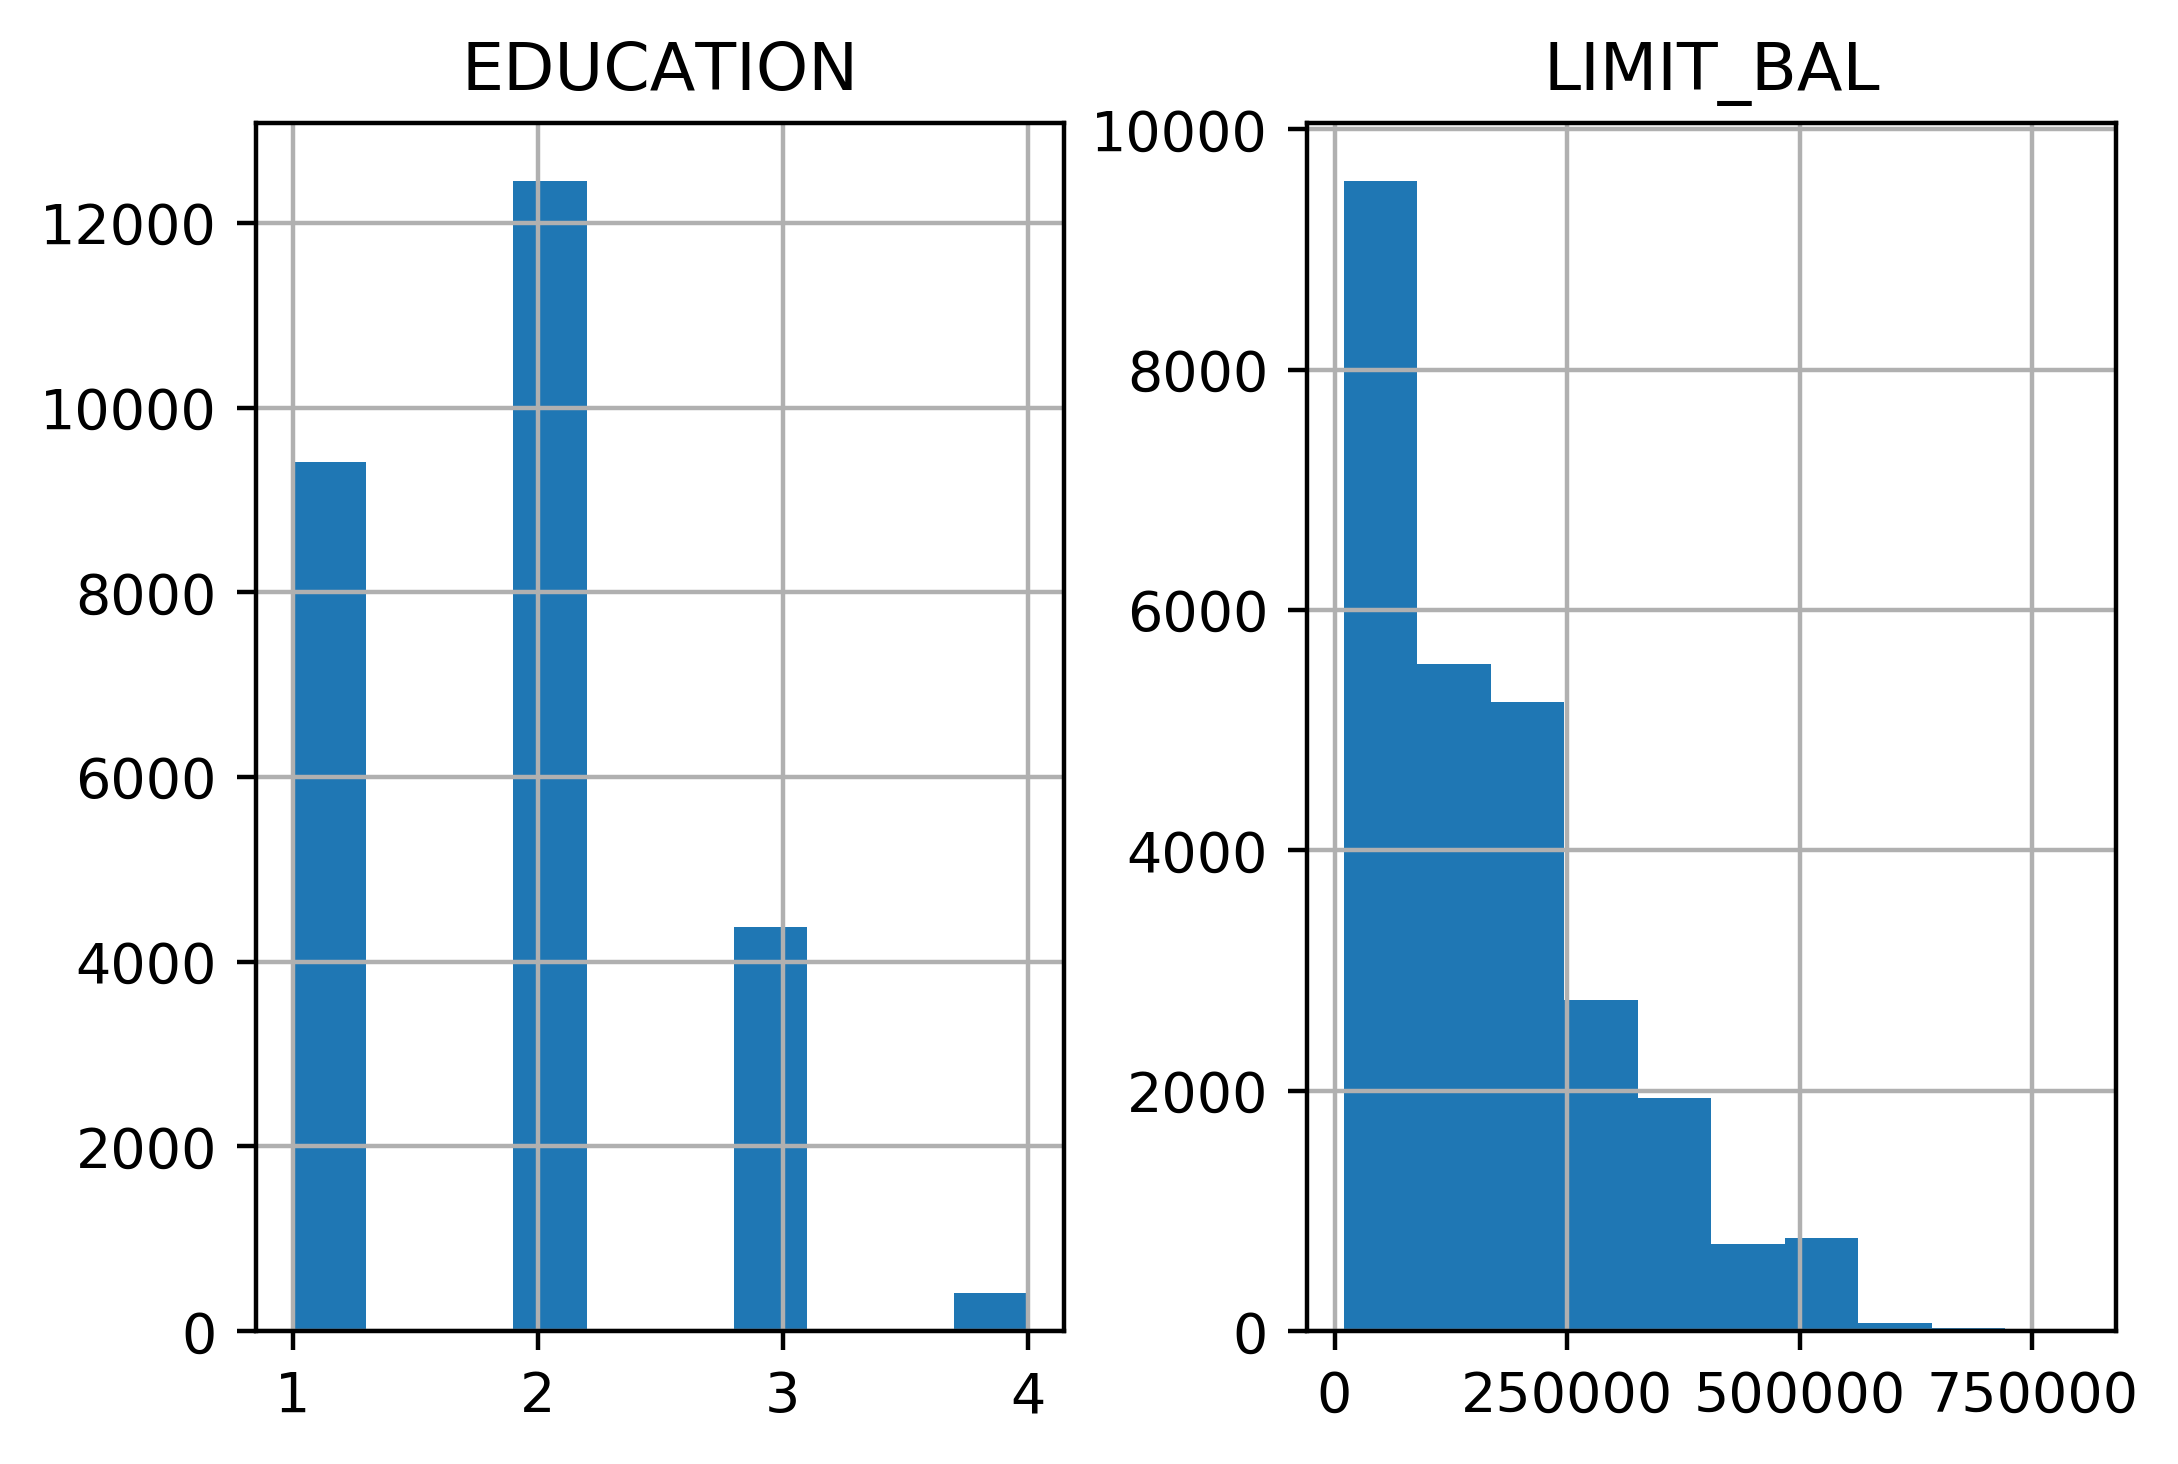

In [7]:
df[['LIMIT_BAL', 'EDUCATION']].hist()

In [8]:
my_lr = LogisticRegression()
my_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
y = df['default payment next month'][0:10].values
print('X is',X ,'\n  &  y is\n', y)

X is [[2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [3]
 [3]] 
  &  y is
 [1 1 0 0 0 0 0 0 0 0]


In [12]:
my_new_lr.fit(X, y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [13]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [14]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [16]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [17]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

 => y = ax + b + N(µ , σ)      

here    a = Slope,
        b = Intercept,
    N = Standard Normal,
    µ = Normal Random Variable by a Mean,
    σ = Standard Deviation, 
    x = Normal Variable,
    y = Density of Probability,

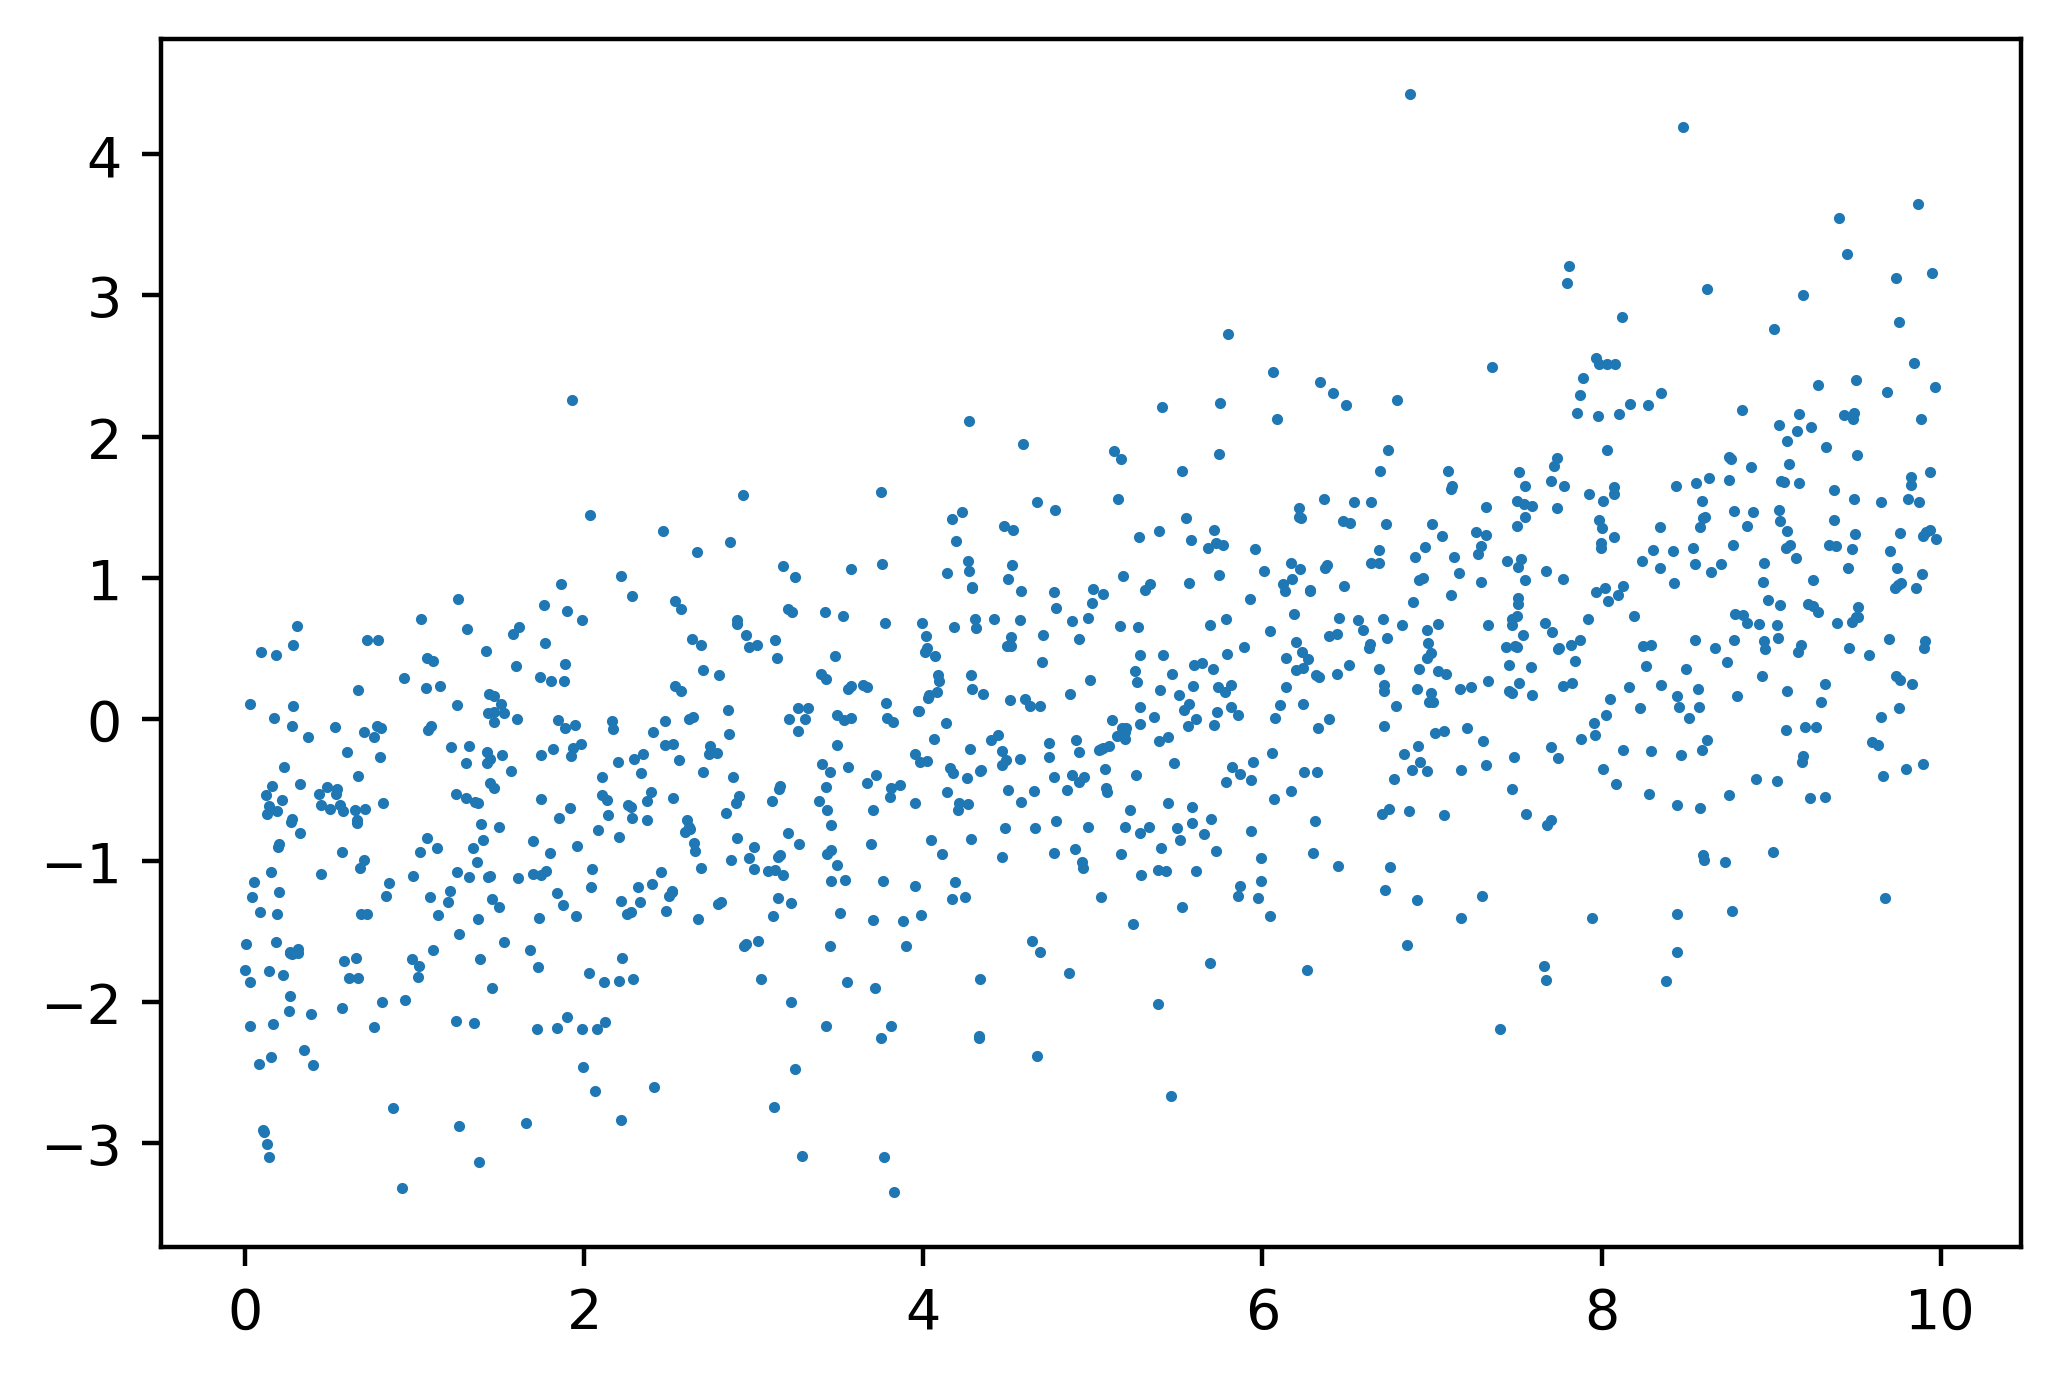

In [18]:
plt.scatter(X,y,s=1)

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.161256600282589
[0.24002588]


In [21]:
y_pred = lin_reg.predict(X.reshape(-1,1))

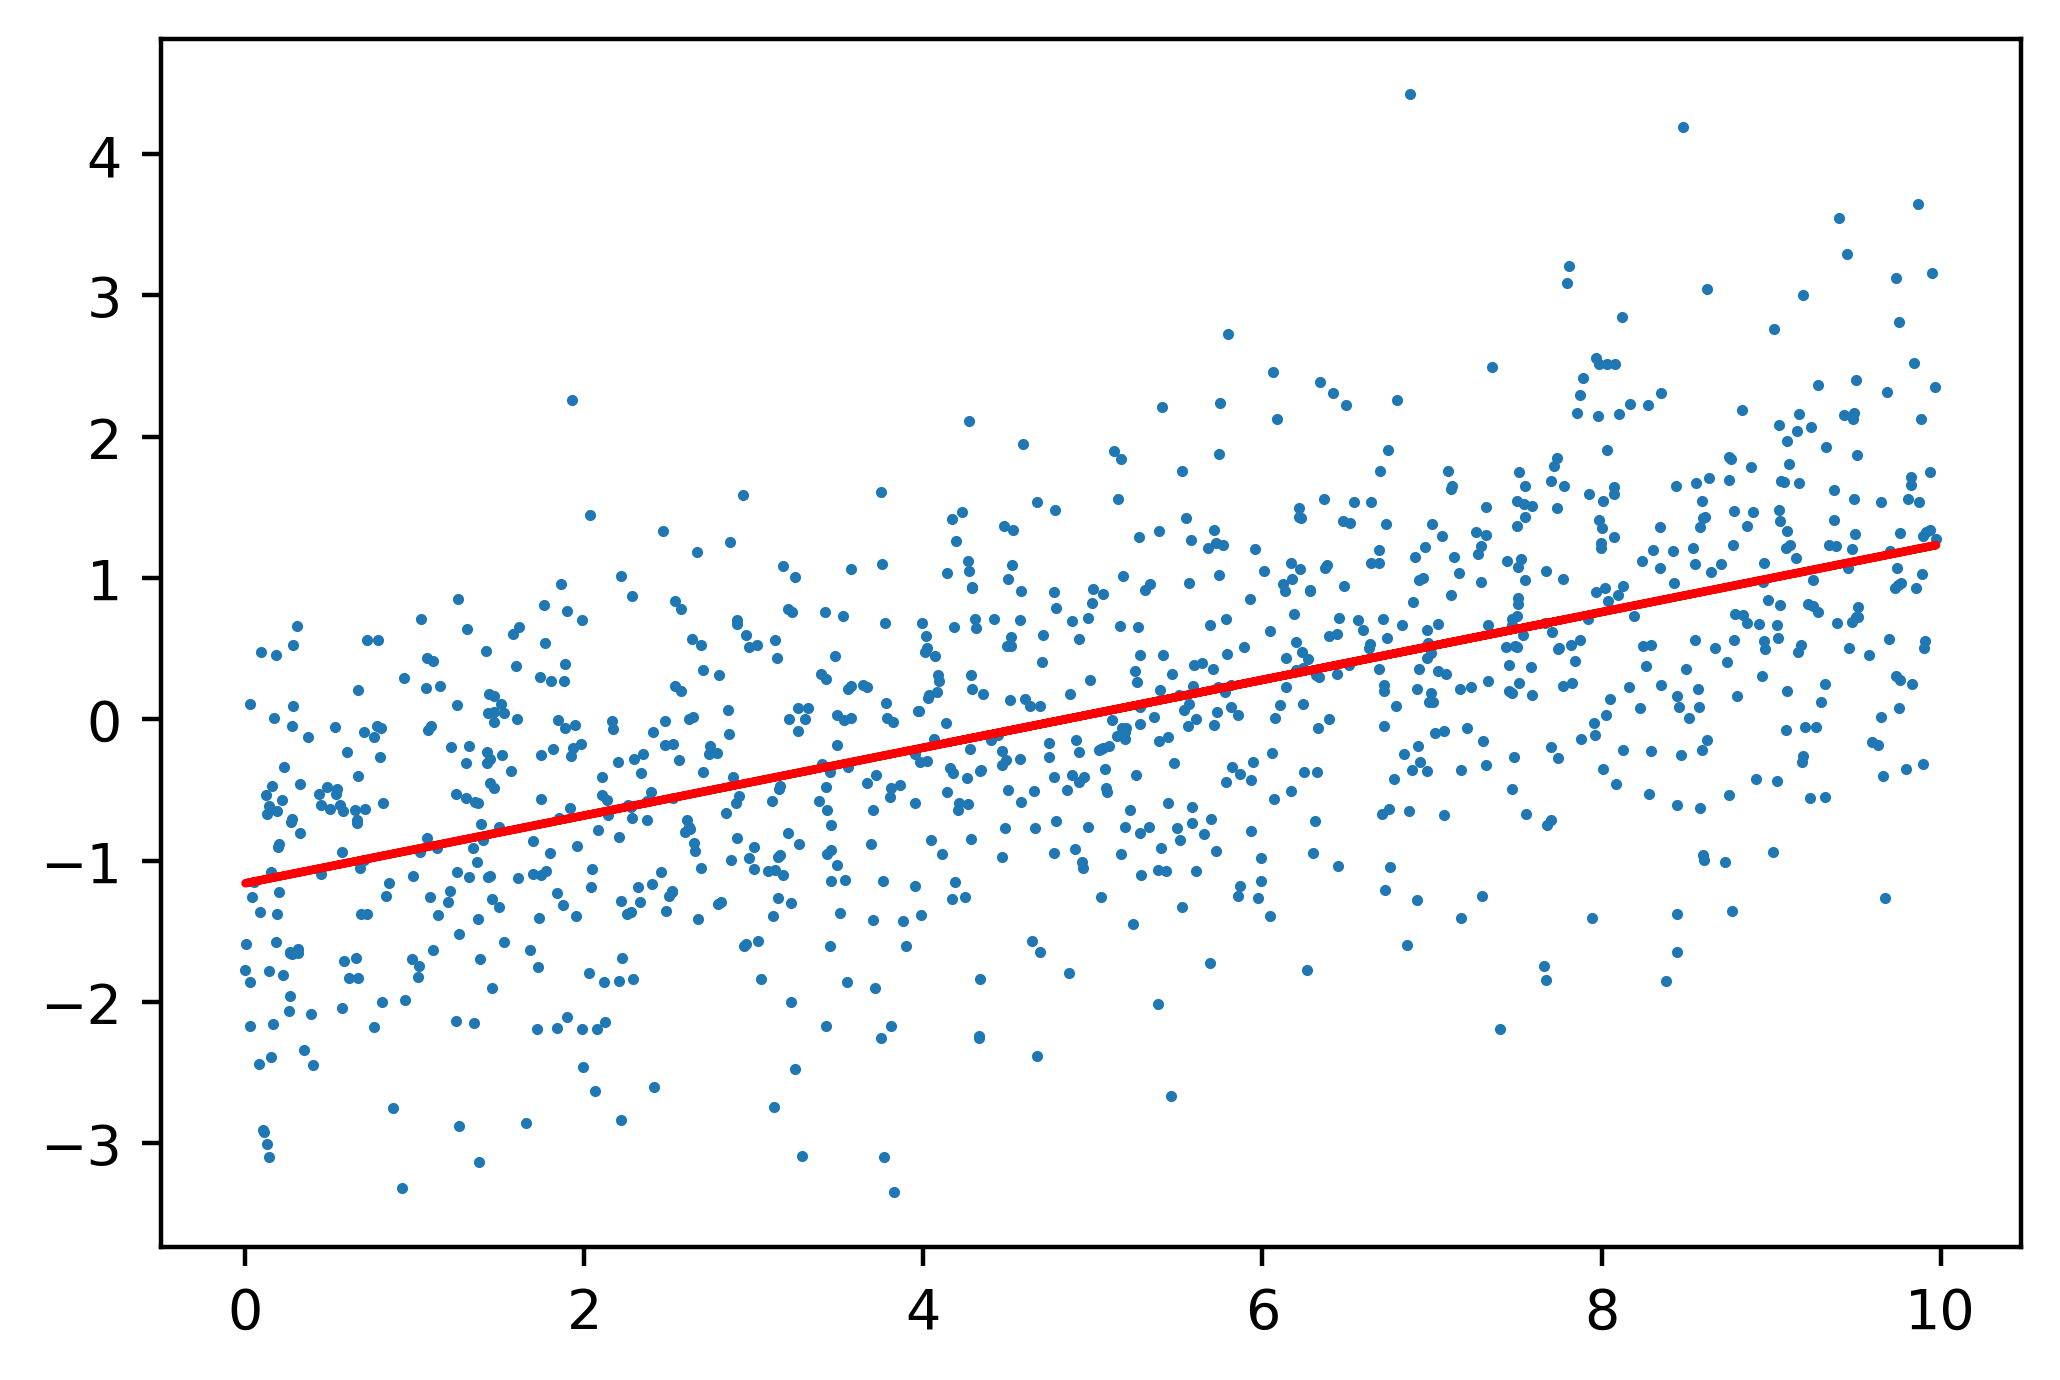

In [22]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [25]:
np.mean(y_train)

0.223102526838873

In [26]:
np.mean(y_test)

0.21657603600225014

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**

_________________________________________________________________________
**Now, plot the ROC curve.**

In [27]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
example_lr.fit(X_train, y_train)
y_pred = example_lr.predict(X_test)

In [29]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [30]:
example_lr.score(X_test, y_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

In [31]:
P = sum(y_test)
P

1155

In [32]:
TP = sum( (y_test==1) & (y_pred==1) )
TP

0

In [33]:
TPR = TP/P
TPR

0.0

In [34]:
FN = sum( (y_test==1) & (y_pred==0) )
FN

1155

In [35]:
FNR = FN/P
FNR

1.0

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**

In [36]:
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


 => True Negative Rate (TNR) = TN/N 

 => False Positive Rate (FPR)= FP/N

In [37]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [38]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [39]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [40]:
prob_sum.shape

(5333,)

In [41]:
np.unique(prob_sum)

array([1.])

In [42]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <a list of 10 Patch objects>)

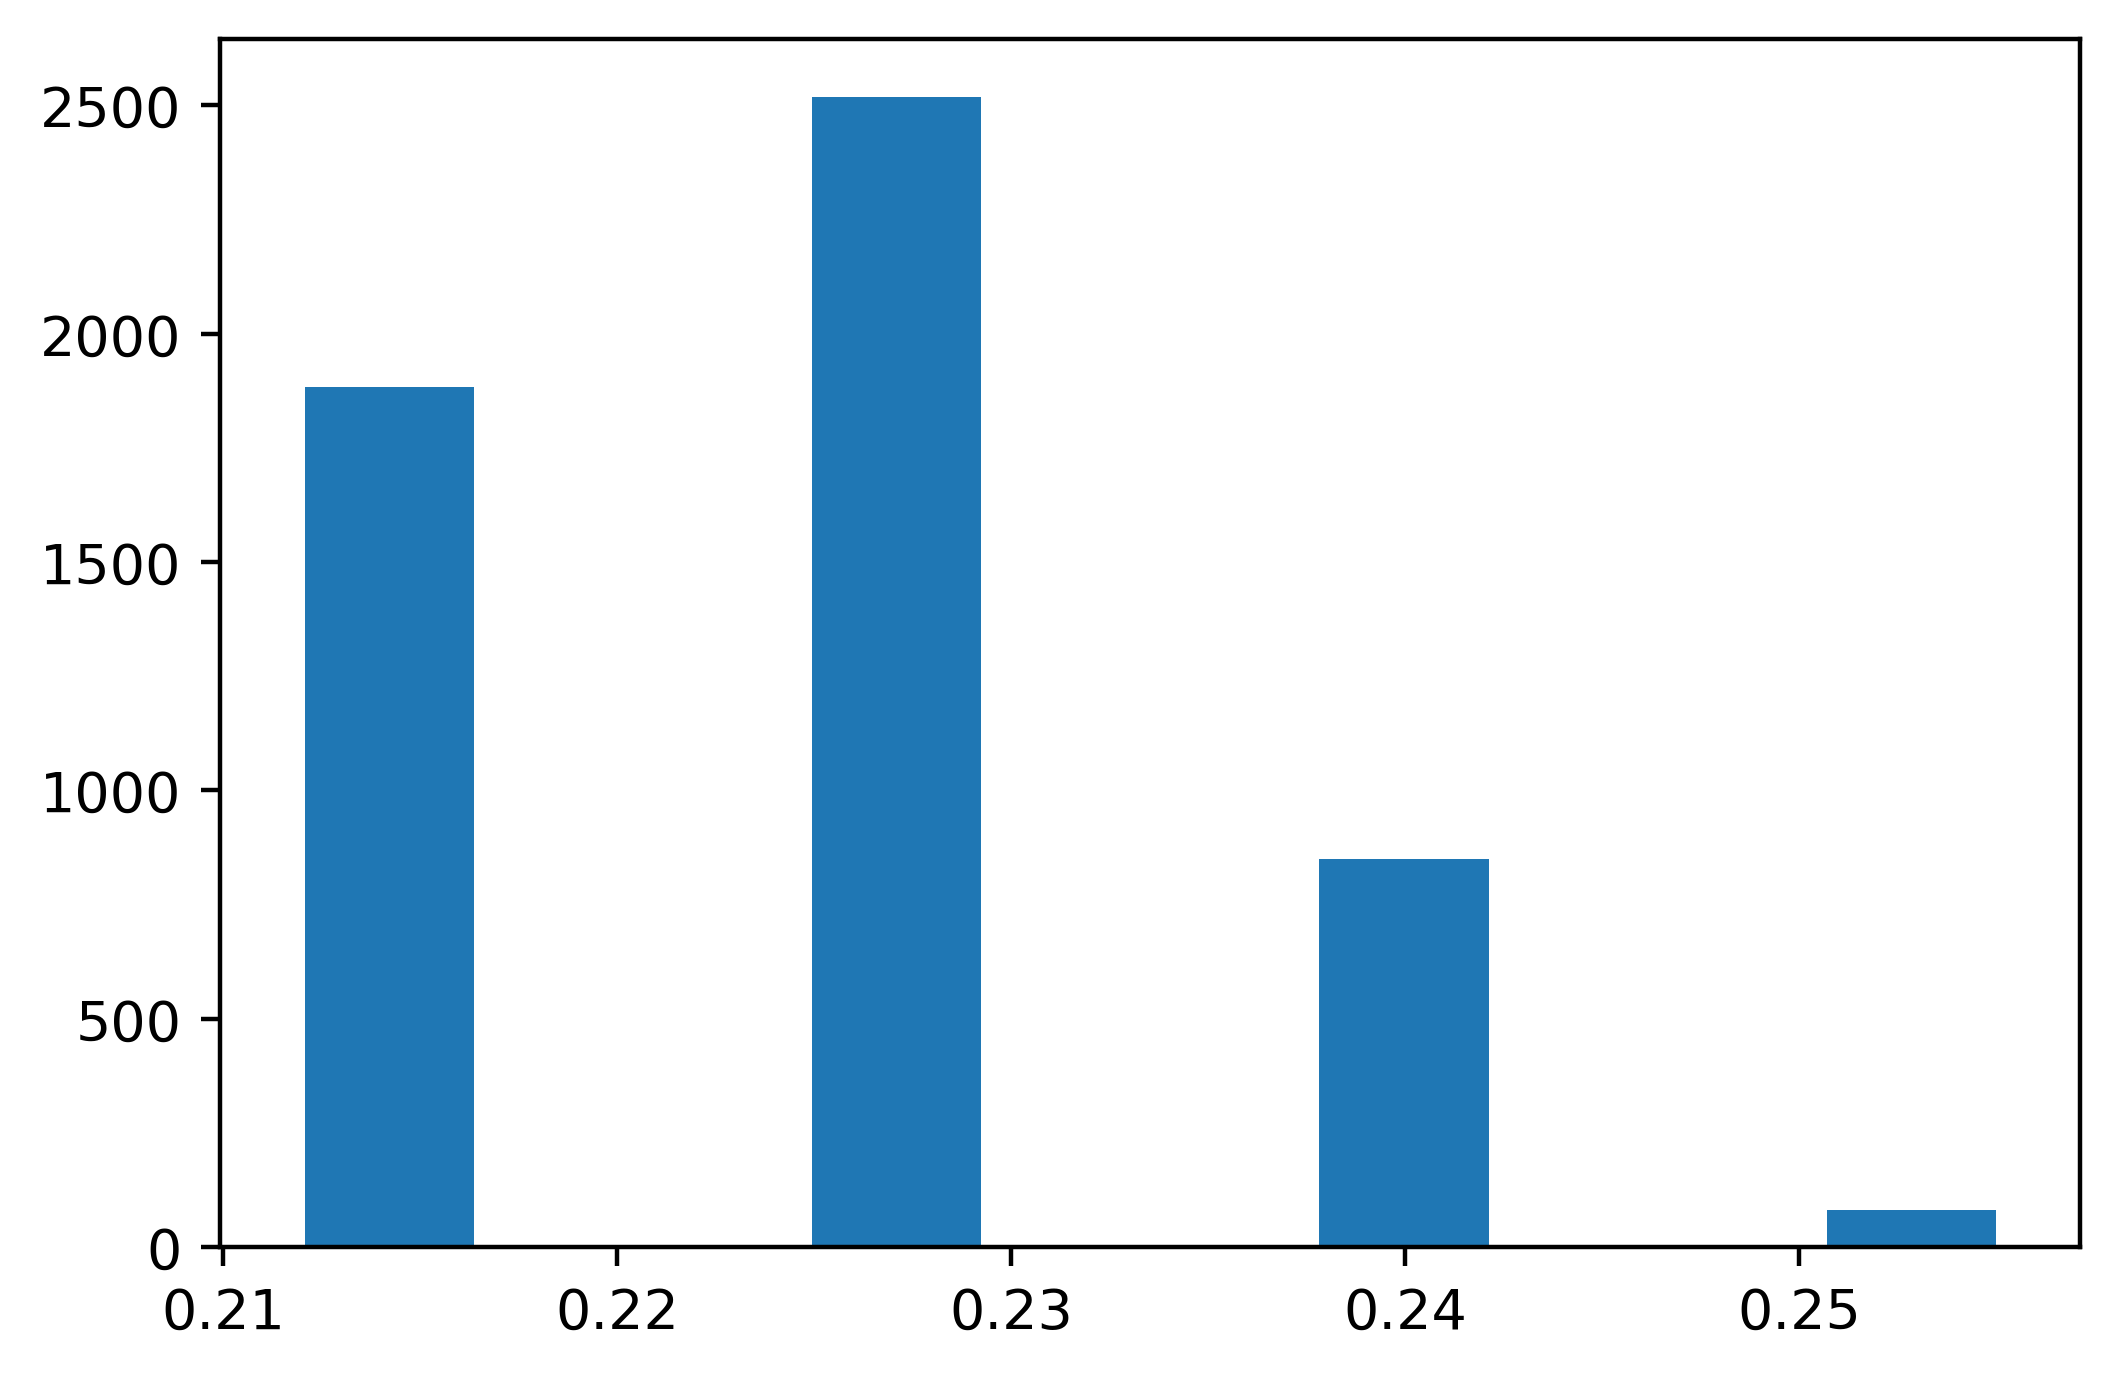

In [43]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

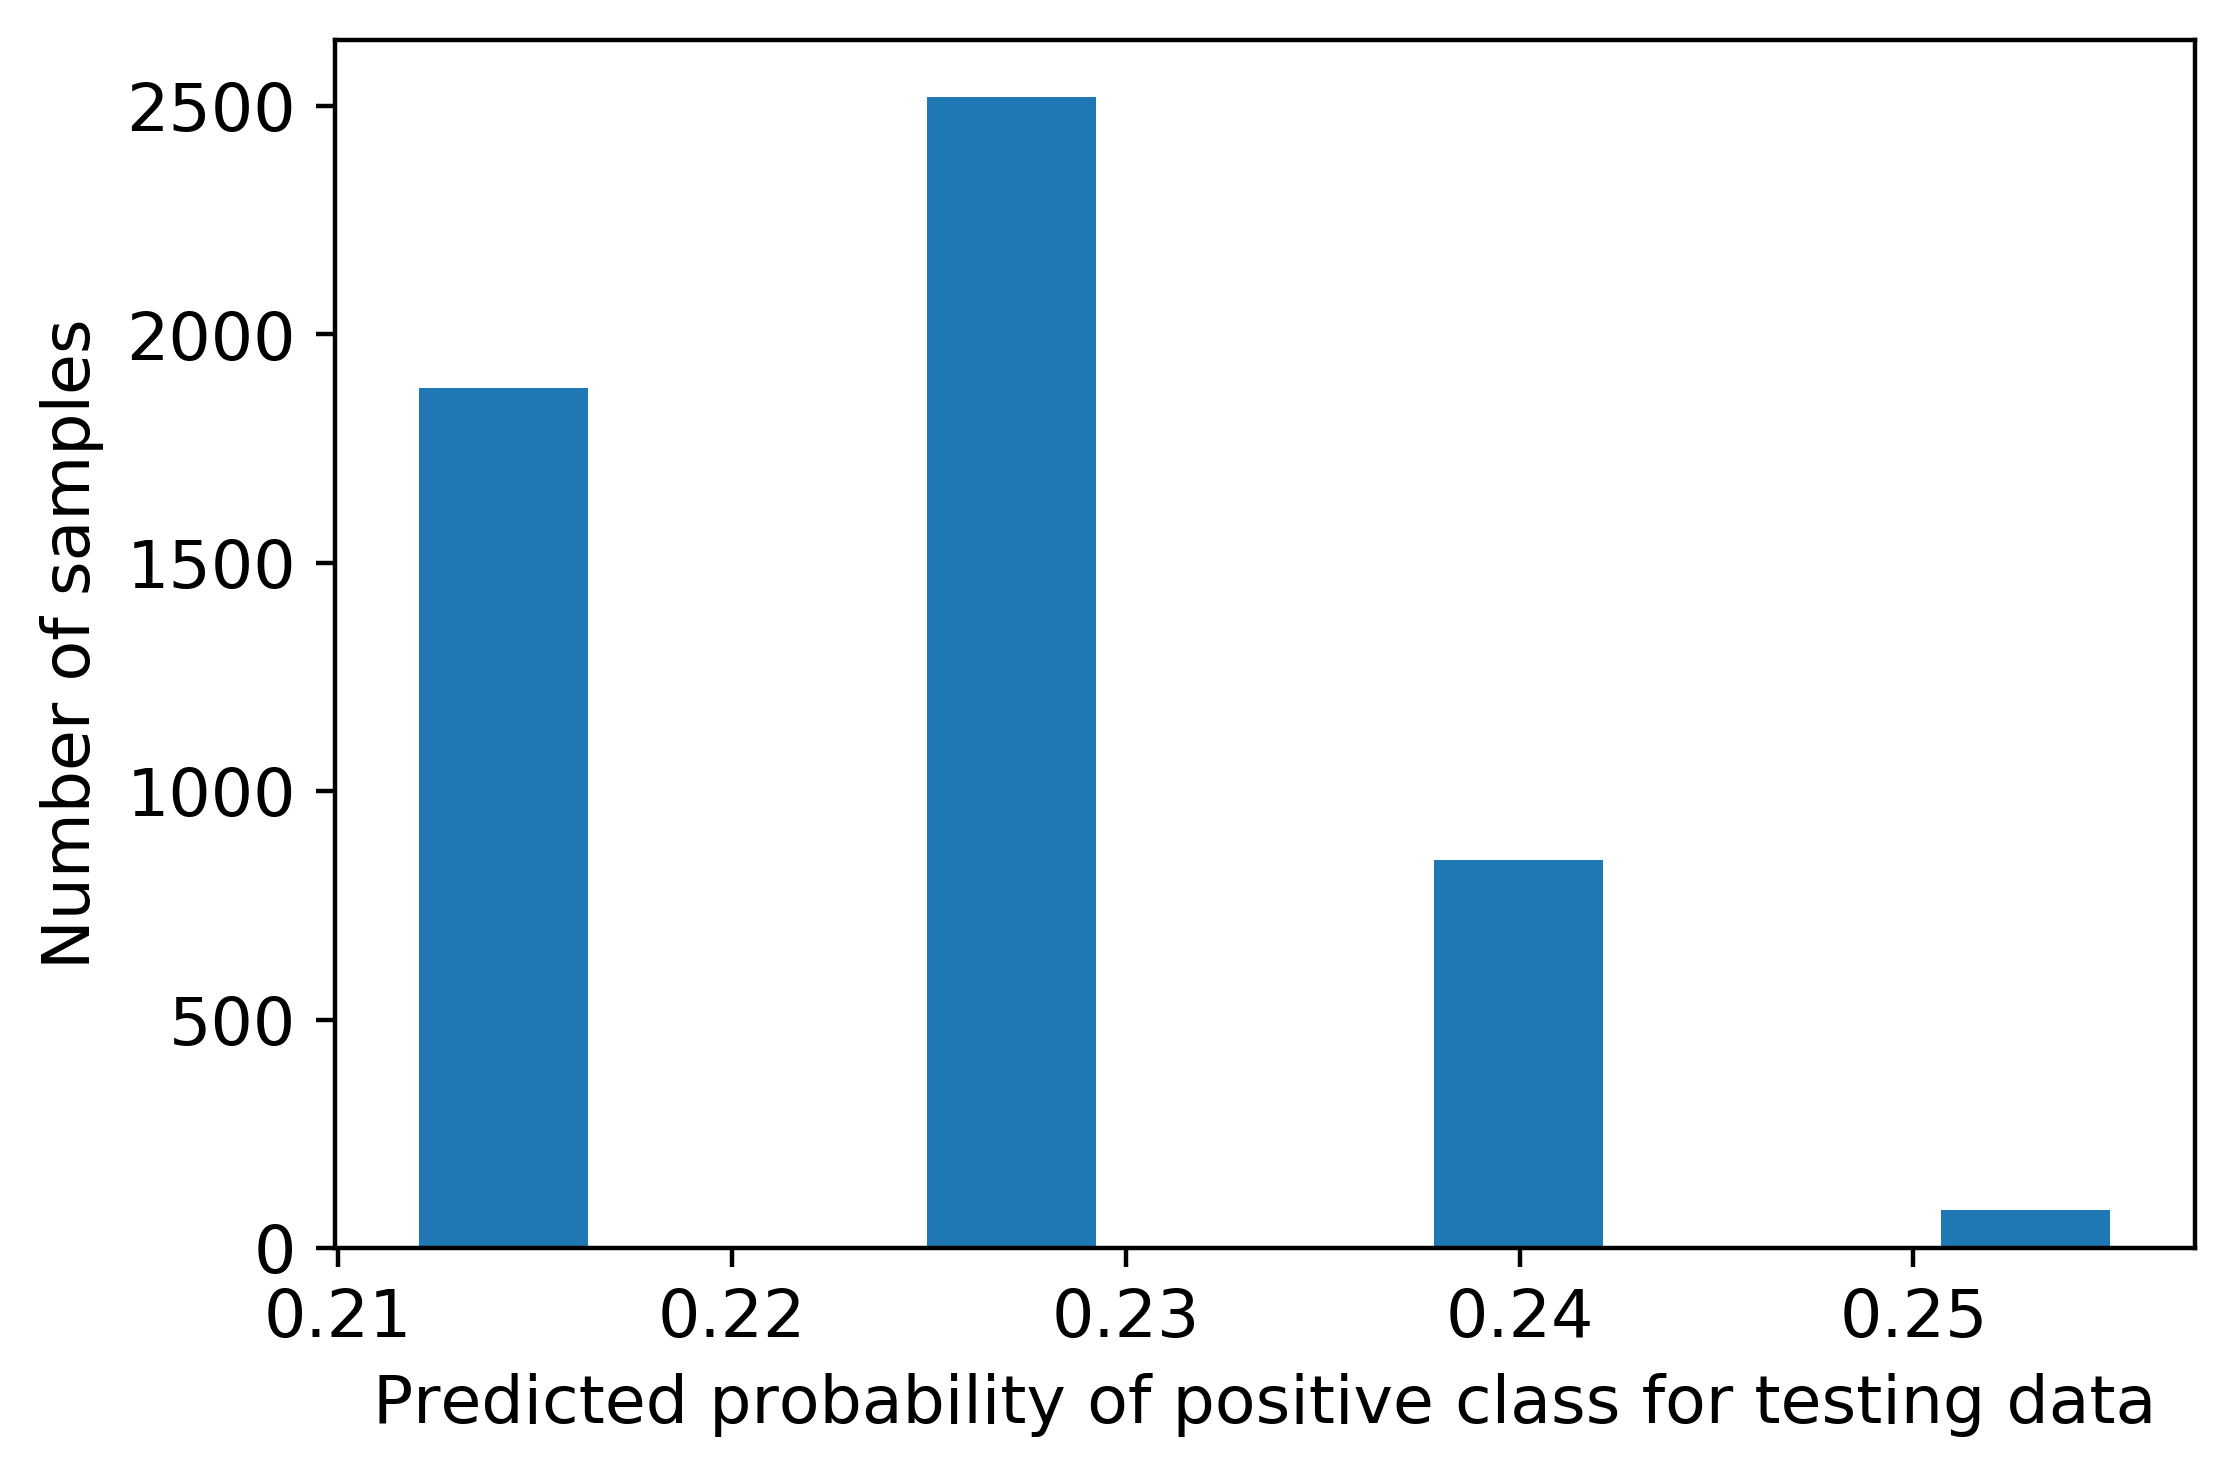

In [44]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [45]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

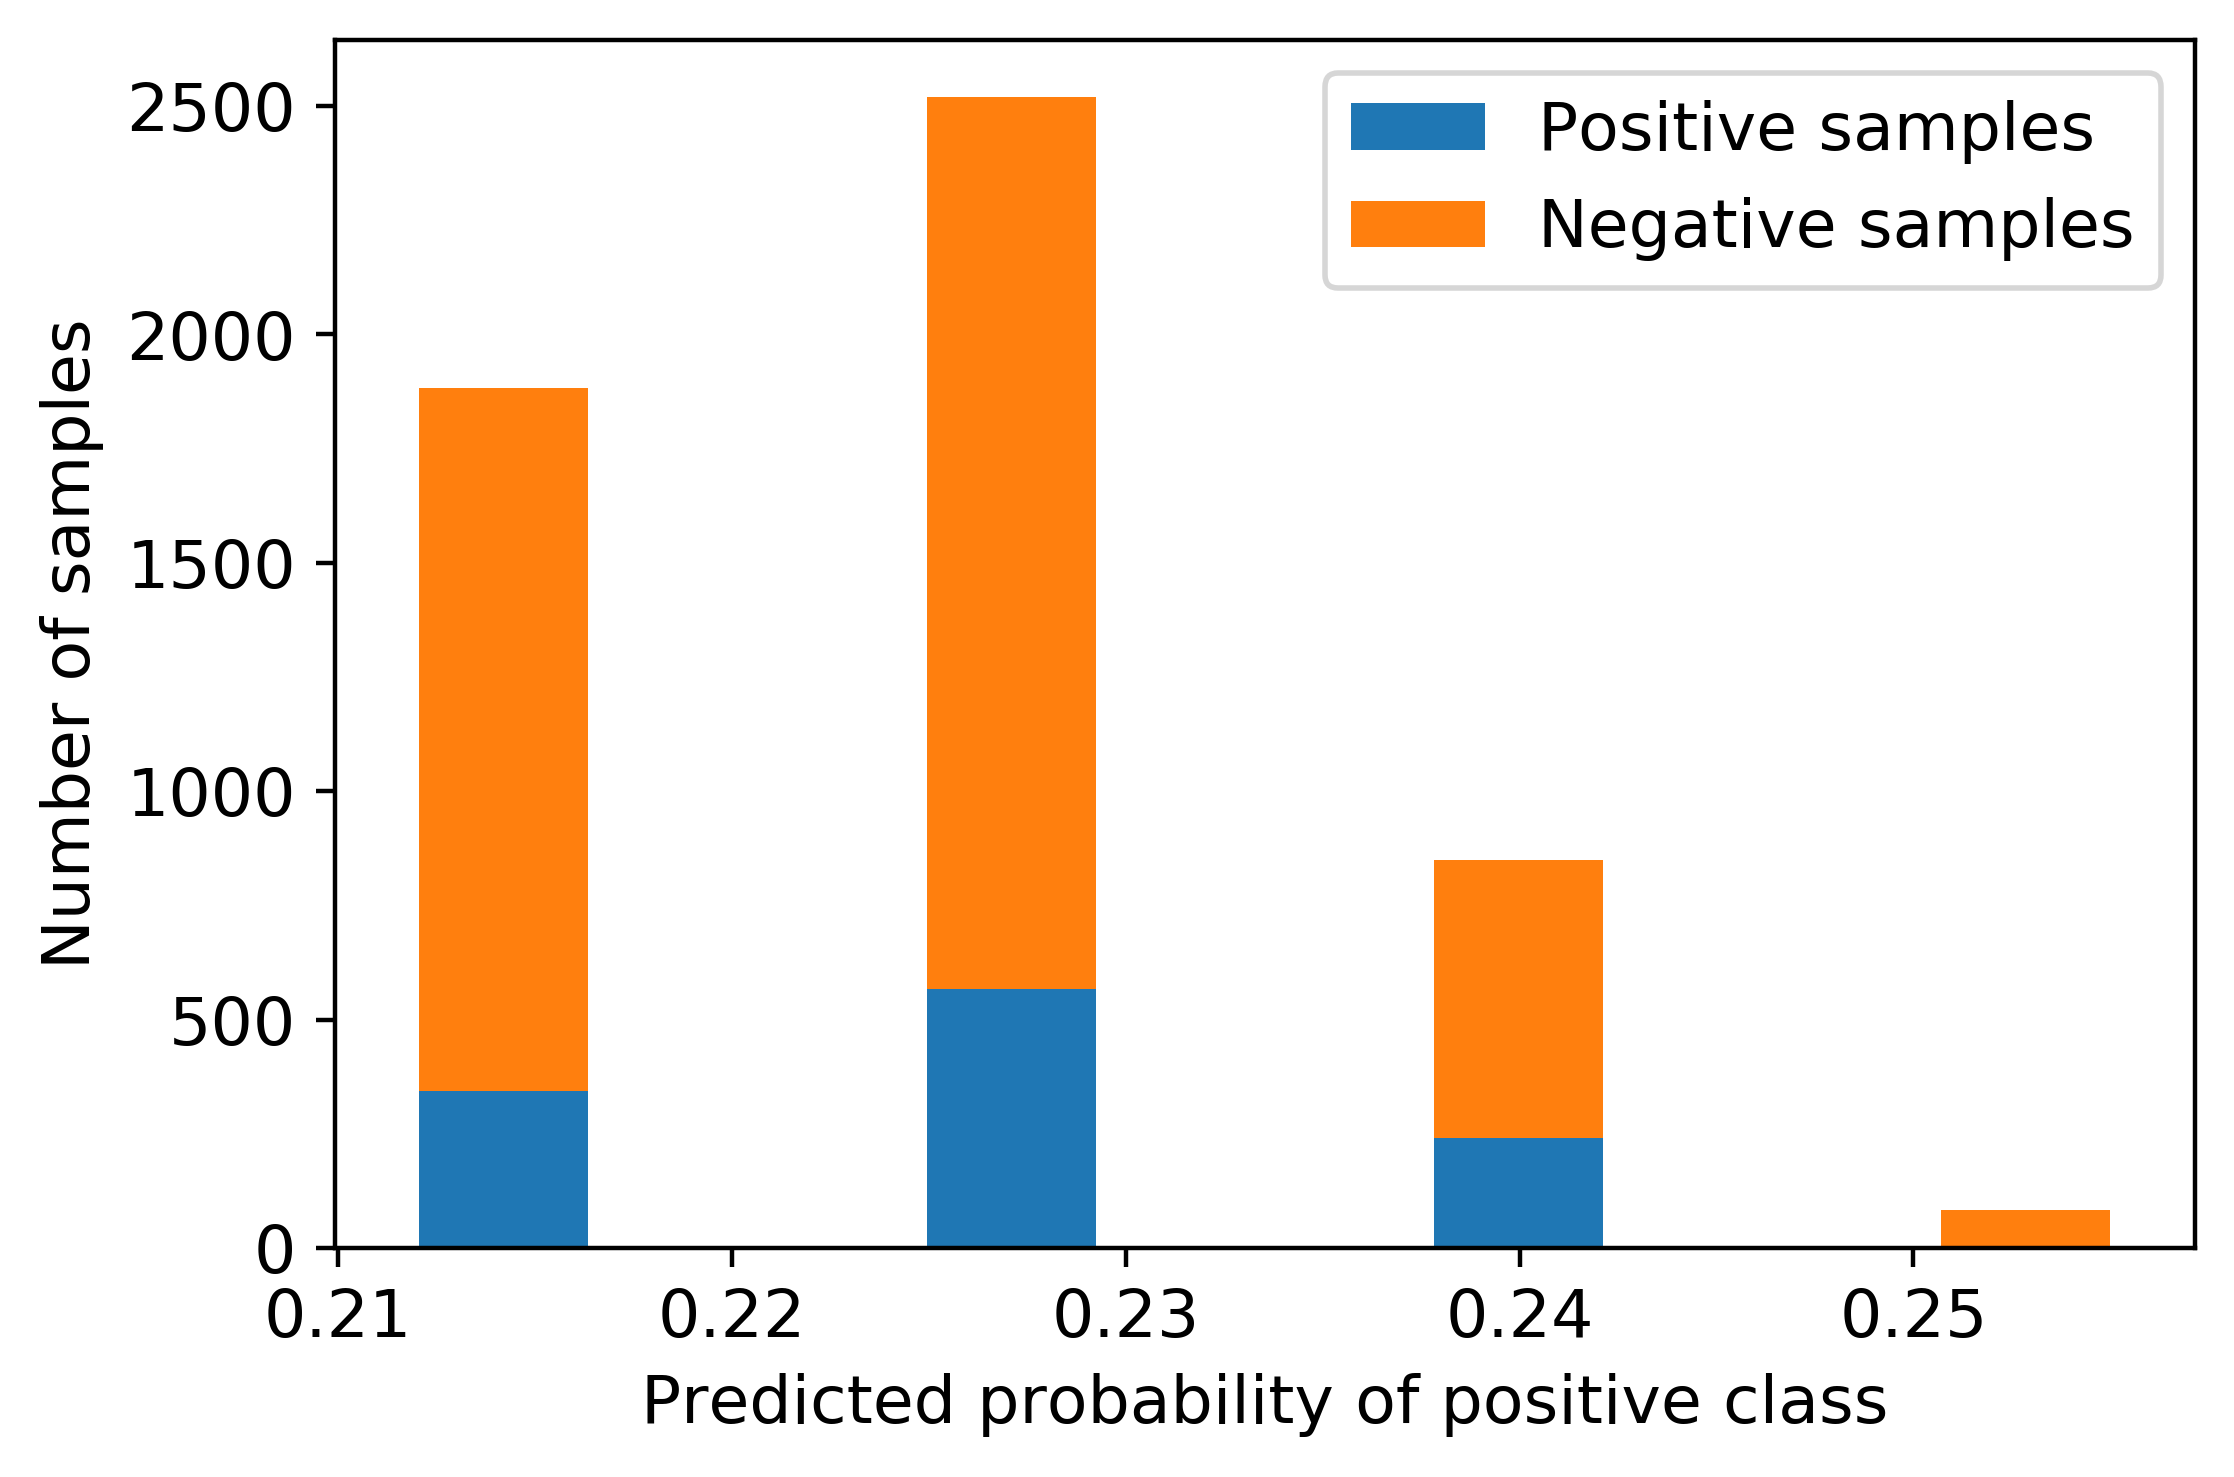

In [46]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

In [47]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'ROC curve')

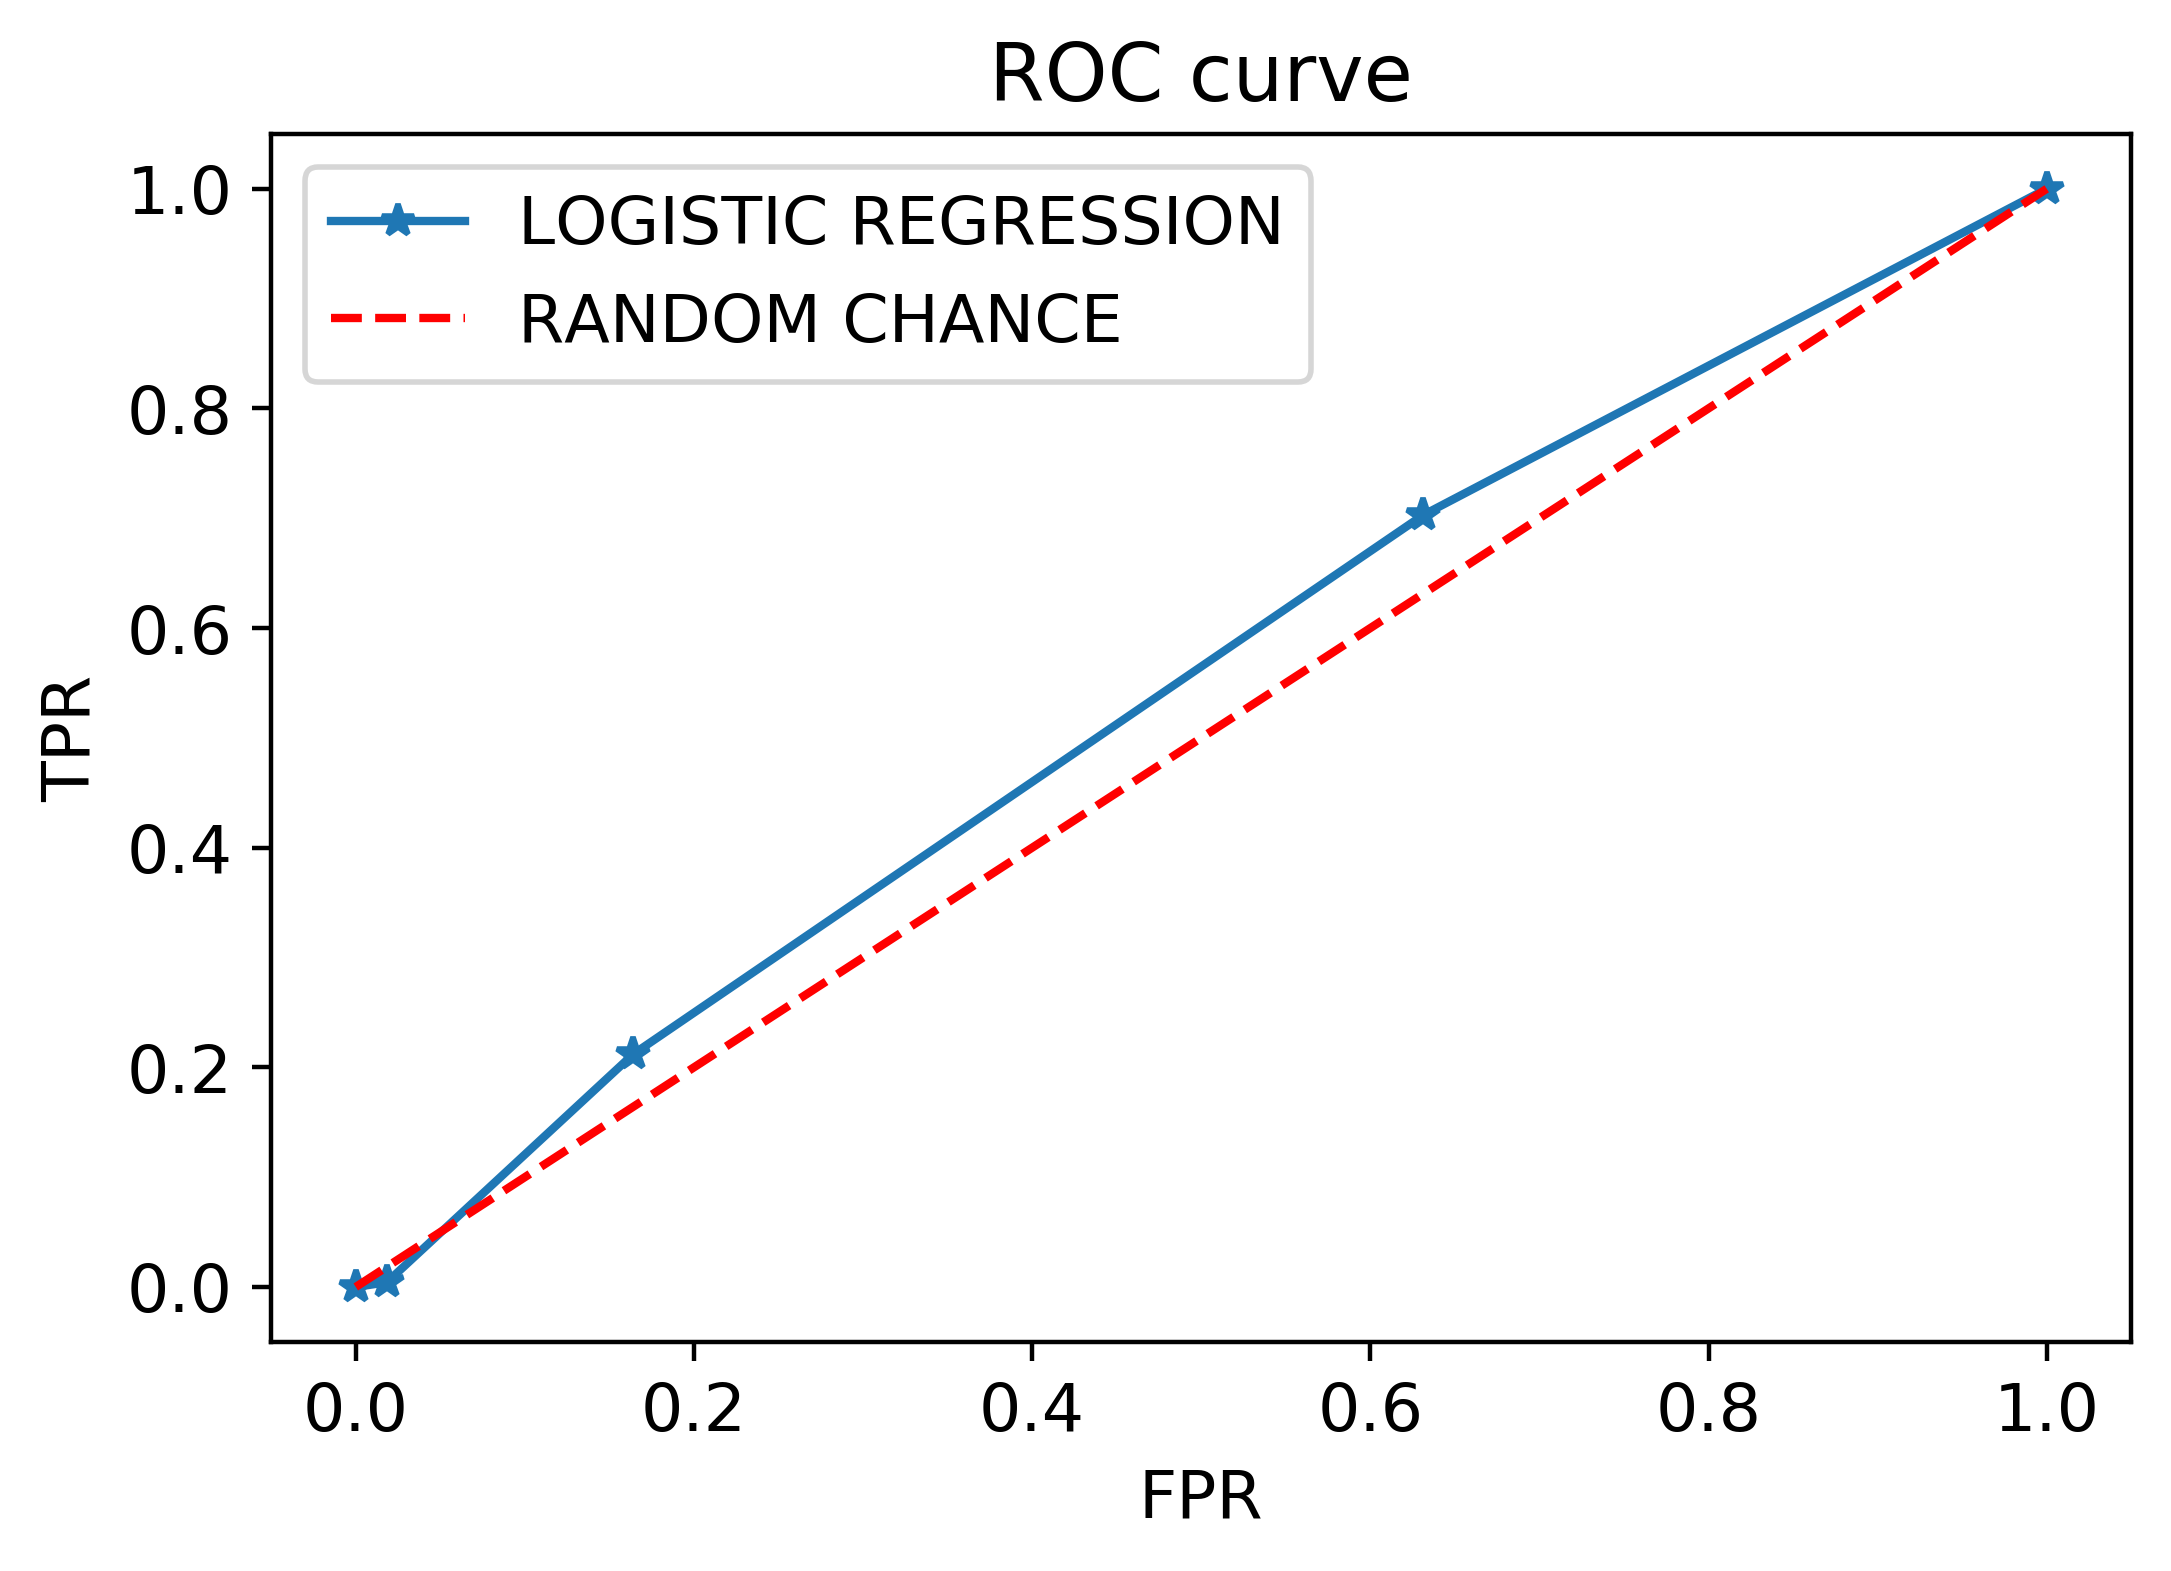

In [48]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['LOGISTIC REGRESSION', 'RANDOM CHANCE'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [49]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [50]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [51]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [52]:
example_lr.fit(X_train_2, y_train_2)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_test_2_pred_proba = example_lr.predict_proba(X_test_2)

In [54]:
metrics.roc_auc_score(y_test_2, y_test_2_pred_proba[:,1])

0.6201990844642832

In [55]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_test_2_pred_proba[:,1])

Text(0.5, 1.0, 'ROC curve with LIMIT_BAL')

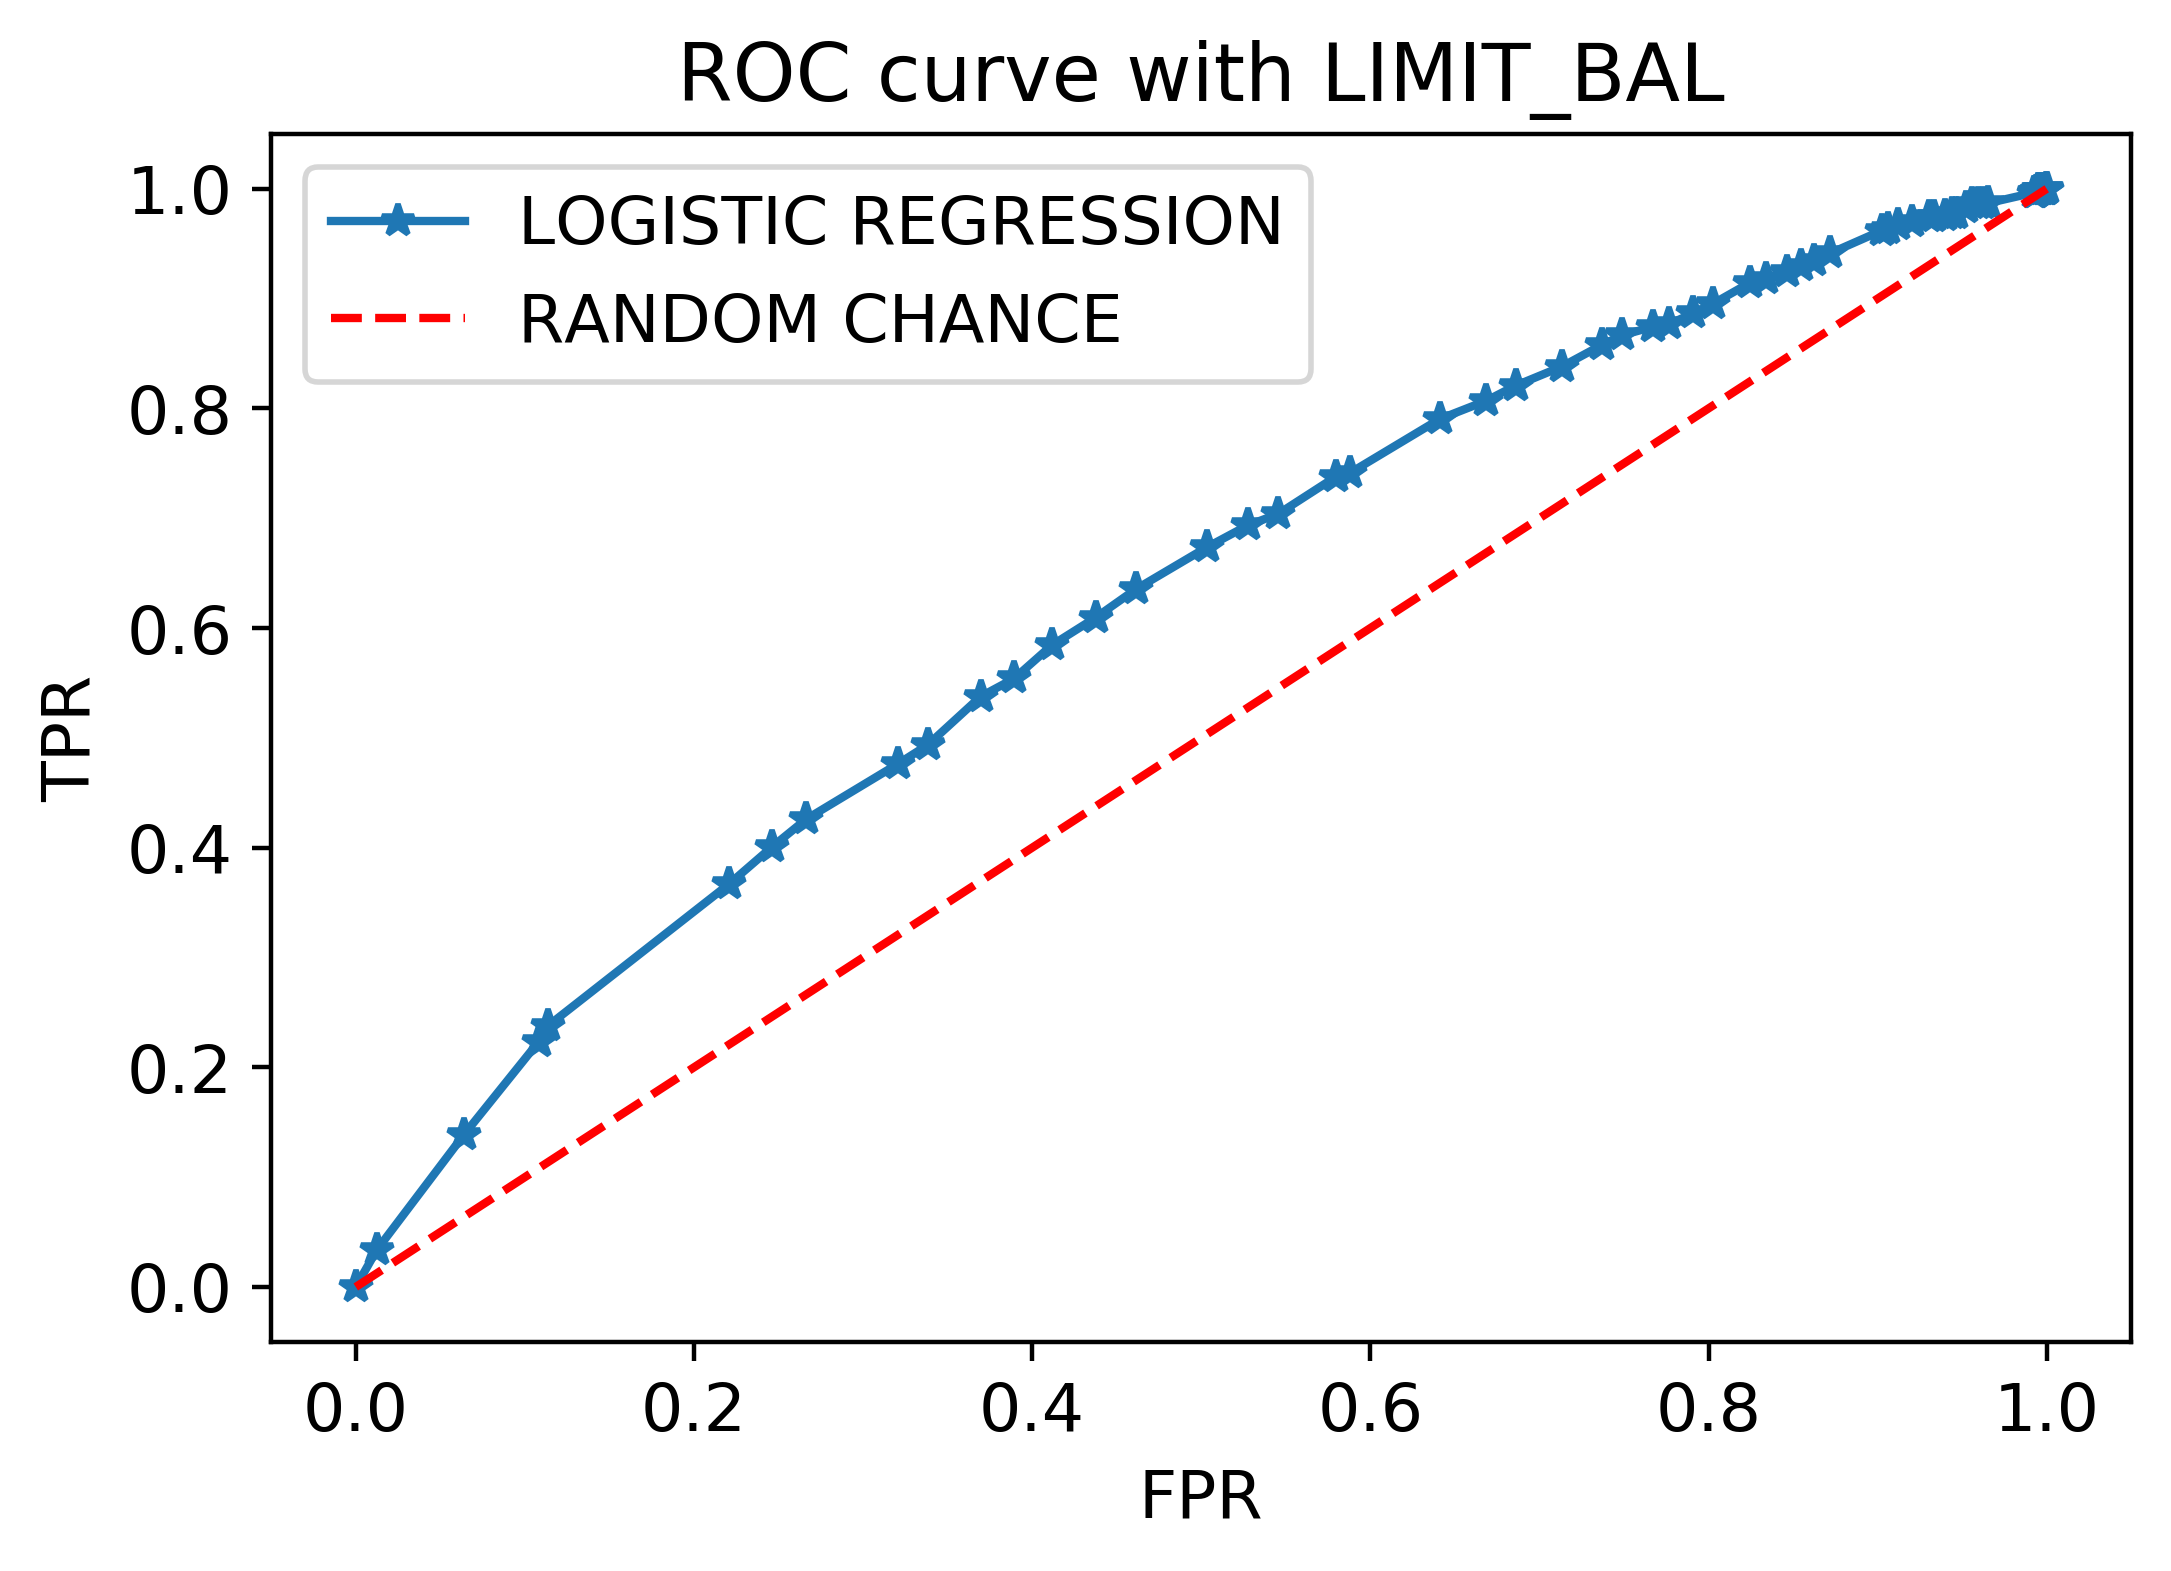

In [56]:
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['LOGISTIC REGRESSION', 'RANDOM CHANCE'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve with LIMIT_BAL')

In [57]:
precision, recall, thresh_3 = metrics.precision_recall_curve(y_test_2, y_test_2_pred_proba[:,1])

  => precision=TP/(TP+FP)

(0, 1)

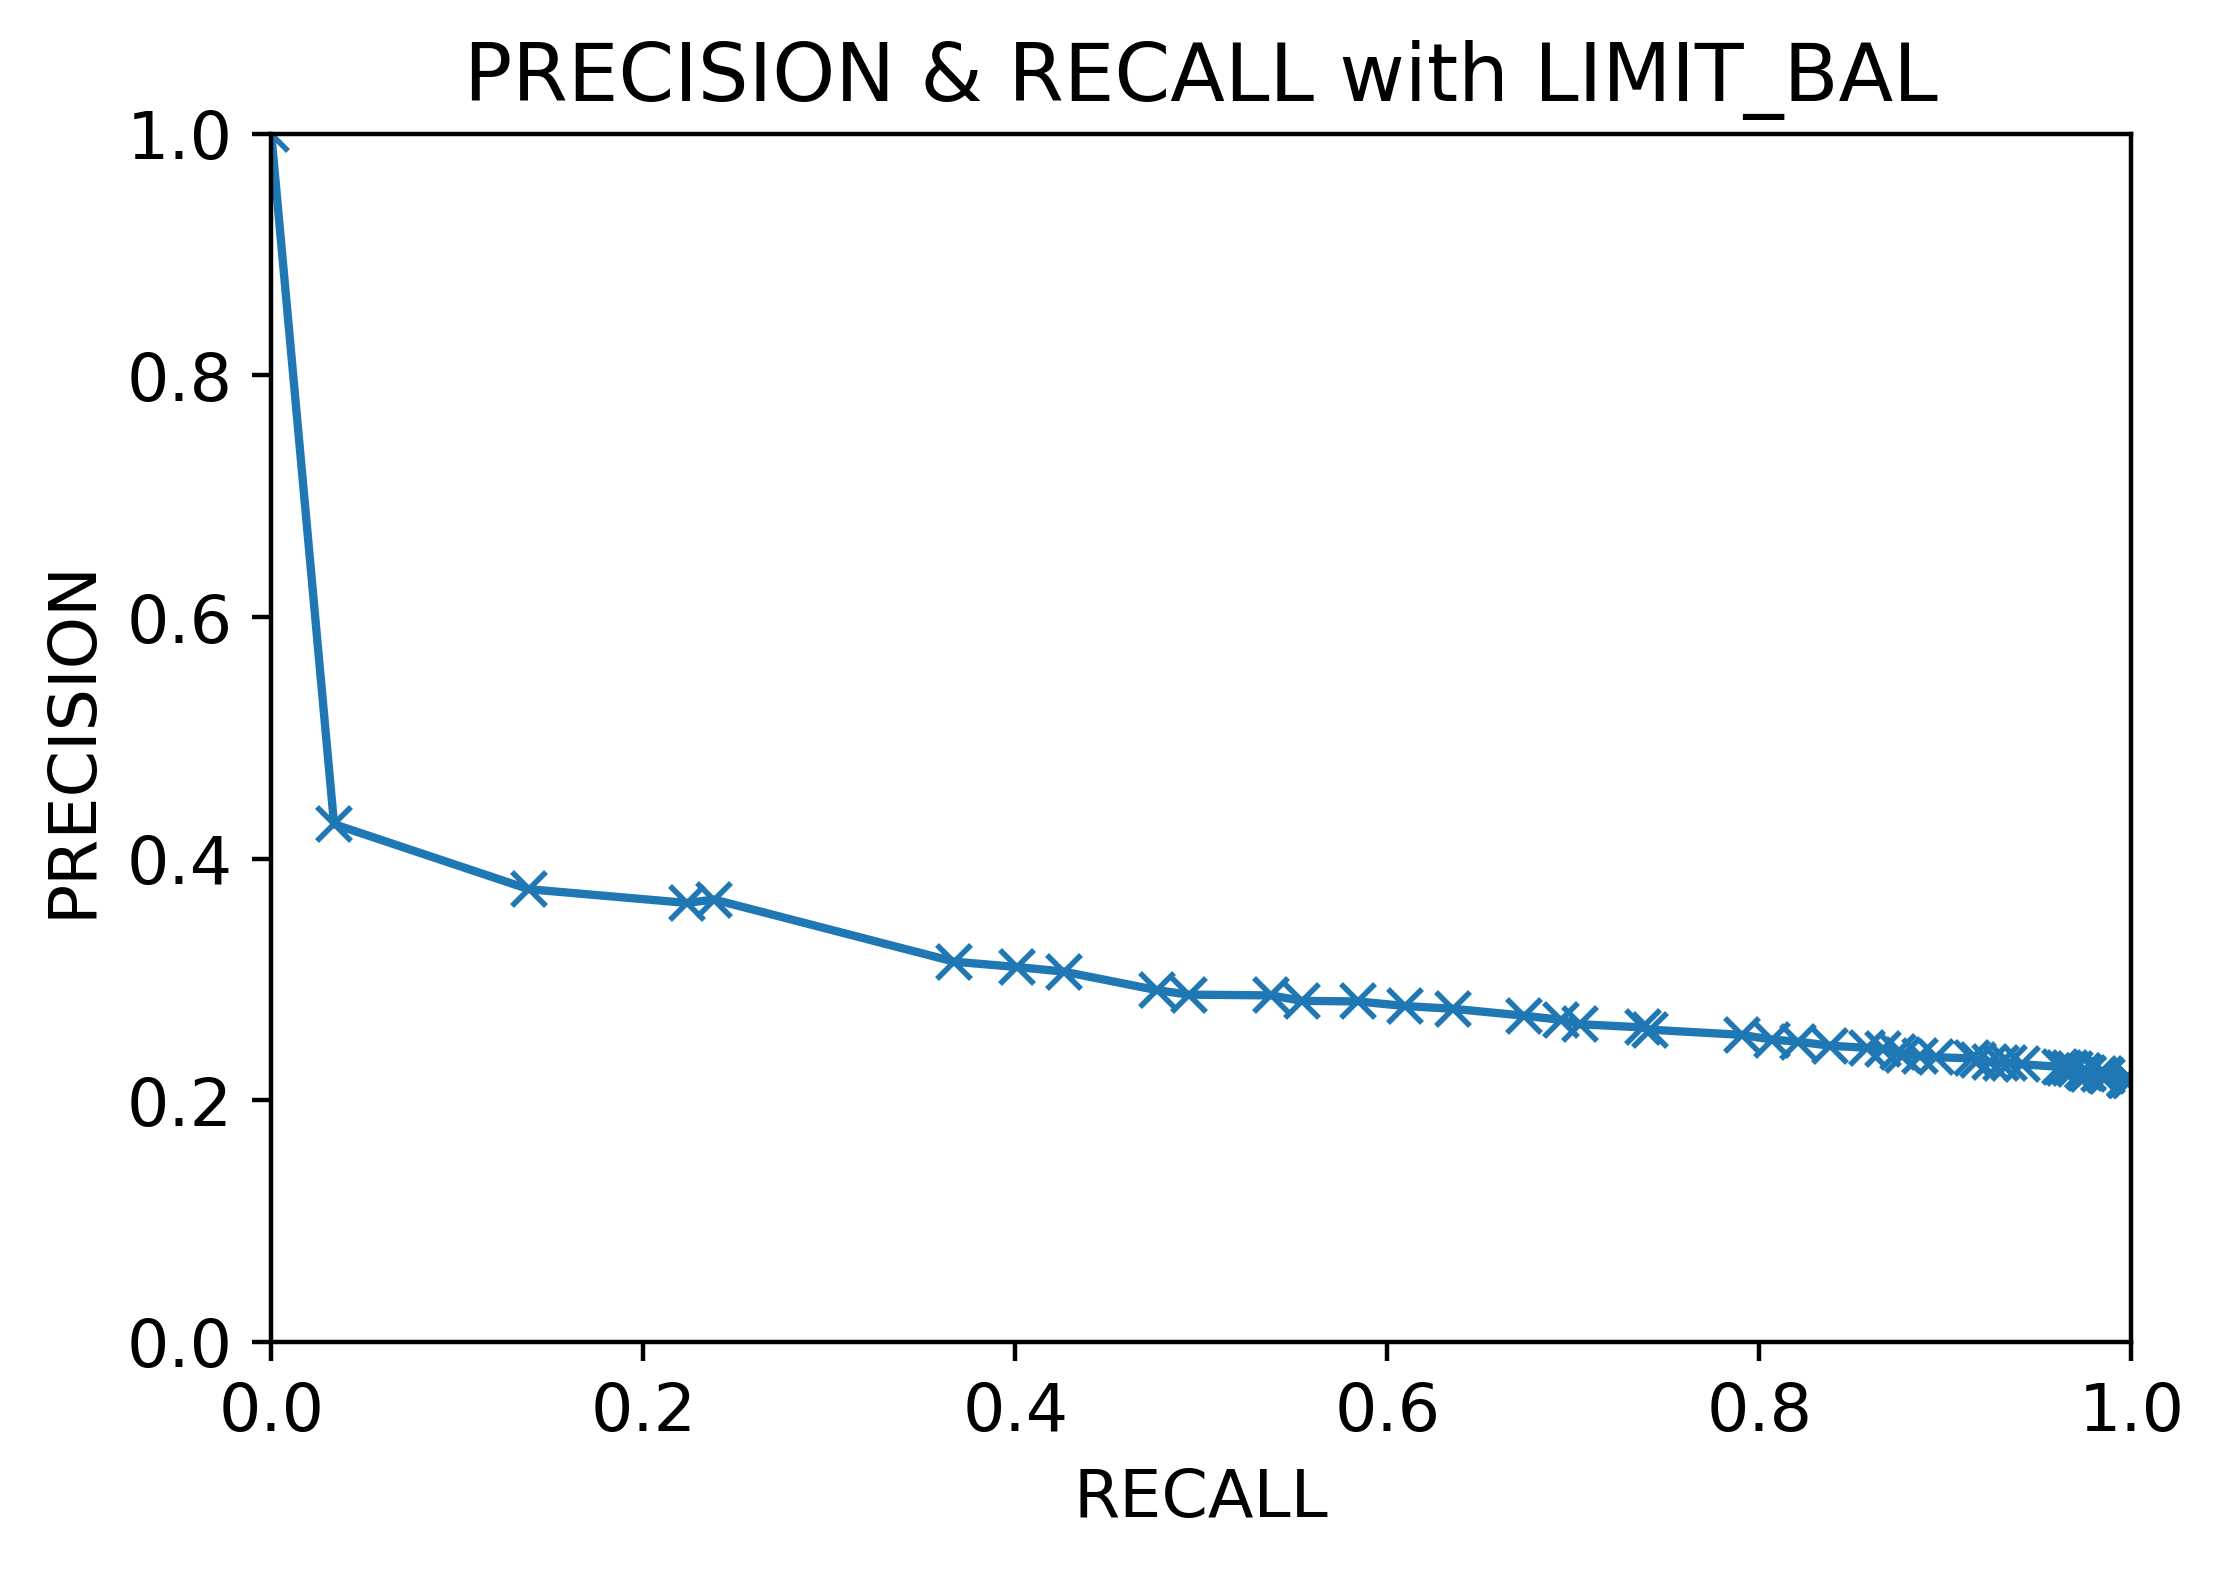

In [58]:
plt.plot(recall, precision, '-x')
plt.xlabel('RECALL')
plt.ylabel('PRECISION')
plt.title('PRECISION & RECALL with LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])

    How is this different, conceptually and quantitatively, from your earlier calculation?


* Difference between 'ROC Curve' and 'ROC curve with LIMIT_BAL' Clear that see values difference in 'Logistic regression' &       'Random chance' is large in second curve.